In [1]:
import pandas as pd
import numpy as np
import os
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Copy of Survey Data--08-27-18.xlsx',
 'Survey Result - Piedmont Environment Council.ipynb',
 '~$Copy of Survey Data--08-27-18.xlsx']

In [3]:
ip_file = "Copy of Survey Data--08-27-18.xlsx"
survey = pd.read_excel(ip_file)
survey.shape

(799, 14)

In [4]:
#Removing first 5 records which has test entries
survey = survey.iloc[5:,]
survey.reset_index = True

In [5]:
survey.iloc[0,12]

'Contiguous bike lanes throughout town; Greenways that connect without being on roads with cars; RTF/City to Monticello'

In [6]:
#Selecting the 12th question to detect some patterns in text data
print(survey.columns[12])

12. Please suggest any specific connections between places or neighborhoods that could make it easier and better to walk, bike, or run. 


In [7]:
q_12_values = survey.iloc[:,12][~survey.iloc[:,12].isnull()]

In [8]:
# Removing all the reviews containing crozet values
q_12_values = q_12_values[~q_12_values.str.lower().str.contains('crozet')]

In [9]:
#Tokenizing all the answers to get word level data
tokens_col = q_12_values.apply(word_tokenize)

In [10]:
#Getting the stopwords from the english language
from nltk.corpus import stopwords
eng_words = set(stopwords.words('english'))

### Standardizing text (lower) and removing stopwords

In [11]:
all_words = []
for each in tokens_col:
    words_lower = [words.lower() for words in each if words.lower() not in eng_words]
    all_words.extend(words_lower)

In [12]:
all_words[1:10]

['bike',
 'lanes',
 'throughout',
 'town',
 ';',
 'greenways',
 'connect',
 'without',
 'roads']

In [13]:
#Calling the counter function to see most common words
word_counts = Counter(all_words)

In [14]:
word_counts.most_common(30)

[('.', 615),
 (',', 379),
 ('bike', 194),
 ('road', 118),
 ('would', 113),
 ('trail', 107),
 (')', 105),
 ('(', 102),
 ('park', 85),
 ('street', 85),
 ('trails', 66),
 ('downtown', 65),
 ('lanes', 64),
 ('city', 64),
 ('walk', 61),
 ('sidewalks', 60),
 ('!', 54),
 ('29', 53),
 ('rivanna', 51),
 ('connect', 50),
 ('sidewalk', 50),
 ('path', 49),
 ('get', 47),
 ('lane', 47),
 ('traffic', 47),
 ('along', 45),
 ('monticello', 44),
 ('area', 43),
 ('also', 42),
 ('safe', 41)]

In [15]:
# Common words excluding the stop words and common words - downtown, 29, rivanna, montincello

In [16]:
#Based on the counter, visulizing the word frequency as a word cloud

### Wordcloud

(-0.5, 699.5, 399.5, -0.5)

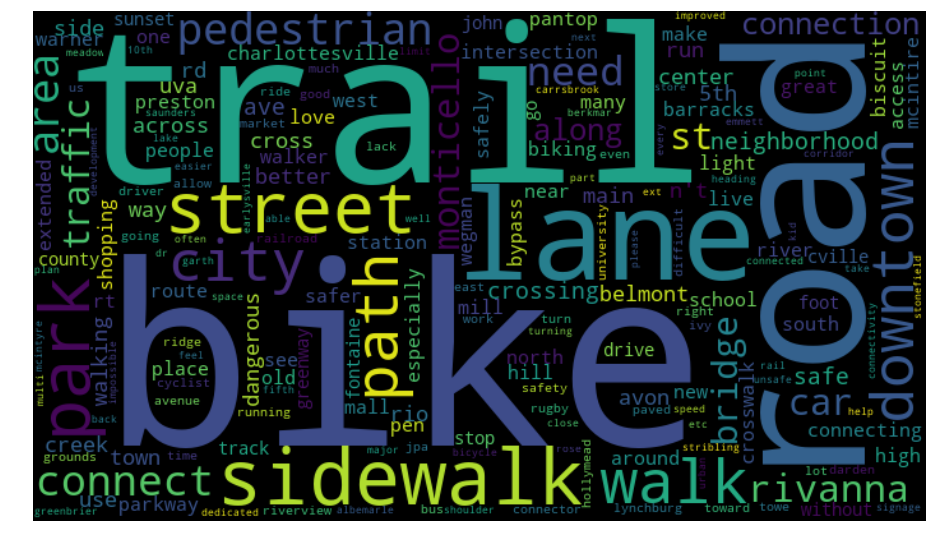

In [23]:
# Generate a word cloud image
# https://github.com/amueller/word_cloud/blob/master/examples/simple.py

text_corpus = ' '.join(all_words)
wordcloud = WordCloud(width=700, height=400,collocations = False).generate(text_corpus)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

### Analyzing the data by adjusting the font sizes

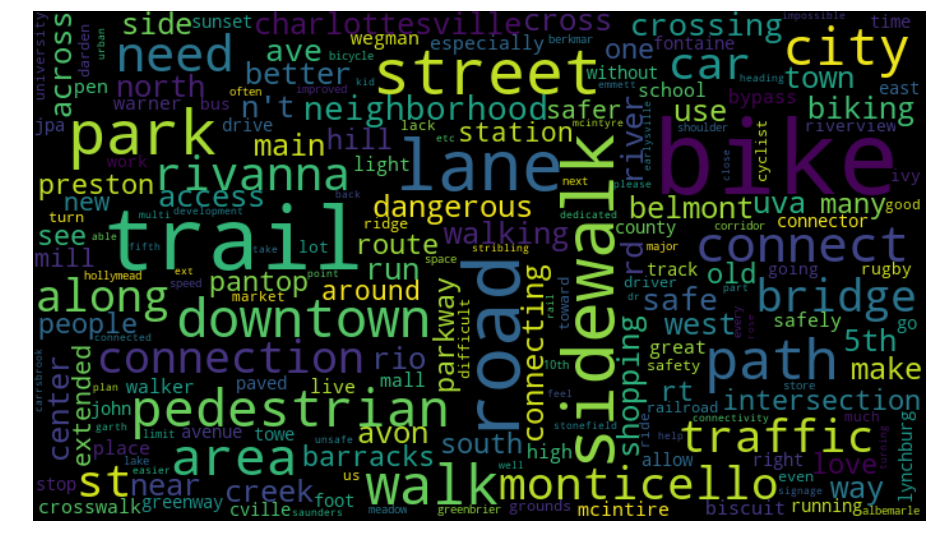

In [18]:
# lower max_font_size
wordcloud = WordCloud(max_font_size=80,width=700, height=400,collocations = False).generate(text_corpus)
plt.figure(figsize=(16,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [19]:
import re

In [20]:
pd.options.display.max_colwidth = 1000

### Manually Analyzing some high frequency words

In [21]:
q_12_text = q_12_values[~q_12_values.apply(lambda x: re.search('downtown',x.lower())).isnull()]
print(len(q_12_text))
q_12_text[1:10]

63


33                                                                                                                                                                                                                    Trails along Meadow Creek connecting to shops on Rt. 29, to UVA, to Downtown, to the Rivanna and Pantops.
46                                                                                                                                                                                                                                                                                                Monticello Trail and downtown
58                                                                                    For trails: connections between RTF, Biscuit Run, Monticello Trails, Observatory Hill, Riverview Park Trails. For city: off street bike baths from major neighborhoods (Belmont, Fry Springs, etc) to West Main/Downtown Mall/IX Art Park
67                                      

In [24]:
q_12_text = q_12_values[~q_12_values.apply(lambda x: re.search('29',x.lower())).isnull()]
print(len(q_12_text))
q_12_text[1:10]

44


31                                                                                                                                                                                                                          \nI NEED a path from North Garden/Crossroads to C'villle, up 29 somehow.  I would bike 100% of the time and get rid of my car and save the planet!  Please - how can I start building this packed gravel/paved trail??
33                                                                                                                                                                                                                                                                                                                                       Trails along Meadow Creek connecting to shops on Rt. 29, to UVA, to Downtown, to the Rivanna and Pantops.
35                                                                                                                                